In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

Compare the analytical cosmic ray spectrum in [Phys. Atom. Nuclei 69, 1293–1298 (2006)](https://link.springer.com/article/10.1134/S1063778806080047) to the data measured in Neutrino Alley (by Yuri Efermenko).
The analytical form considers cosmic rays from 1 GeV/c to $10^5$ GeV/c

Eq (1) in this paper is in unit of /($cm^2\cdot s\cdot sr$).  If integrating p from 1 to 1e5 GeV/c, at $\theta$ =0, we get 0.0076 muons from Eq (1), corresponding to 76 muons/($m^2\cdot s\cdot sr$), which matches the text describing the vertical flux.

Yuri mentioned the overburden of Neutrino Alley cuts off the muons with momentum less than 2-3 GeV/c.  Here I am using 3 GeV/c as the cutoff number.

In [2]:
# momentum range in GeV/c
pmin = 3
pmax = 100000

In [3]:
# Analytical cosmic ray flux from the paper
def dI_fixedTheta(p, theta):
    return 18/(p*np.cos(theta)+145)* (1./np.power((p+2.7/np.cos(theta)), 2.7))* (p+5)/(p+5/np.cos(theta))

In [4]:
# 1-D integral
theta = 0
I = integrate.quad(dI_fixedTheta, 1, pmax, args = (theta))
I

(0.007616289748579744, 6.872866754004511e-10)

My double integral (not tested yet)
> def dIdpdcosth(theta):
>
>     return integrate.quad(dIdp, 1, 100000, args = (theta,))

Yuri's measurement doesn't cover the full $2\pi$ in $\phi$-axis, instead, it covers 14/44 = 0.32 rad.

In [5]:
# Analytical cosmic ray flux times Jacobian (for the solid angle)
def dI(theta, p):
    return 18/(p*np.cos(theta)+145)* np.power((p+2.7/np.cos(theta)), -2.7)* (p+5)/(p+5/np.cos(theta))* 2*np.pi*np.sin(theta)

In [6]:
I = integrate.dblquad(dI, pmin, pmax, 0, 7/44)
I

(0.00028011993254451655, 7.736820094347712e-10)

In [7]:
# Theta points taken from Yuri's measurement
thetaArray = np.array([-80, -70, -60, -45, -30, -15, 0, 15, 30, 45, 60, 70, 80])
# thetaLowerBinEdge = np.array([0, 7.5, 22.5, 37.5, 52.5, 65, 75])
# thetaUpperBinEdge = np.concatenate([thetaLowerBinEdge[1:], [85]])
# thetaUpperBinEdge

In [9]:
IArray = np.array([
    integrate.dblquad(dI, pmin, pmax, max(0, theta_c*np.pi/180 -7/44), theta_c*np.pi/180+7/44)
    for theta_c in np.absolute( thetaArray )
    # for theta_a, theta_b in zip(thetaLowerBinEdge, thetaUpperBinEdge) 
])
IArray

array([[5.14180936e-04, 5.47562463e-11],
       [1.39080245e-03, 1.85929850e-09],
       [2.31820968e-03, 1.70785062e-11],
       [3.13843999e-03, 5.57484465e-10],
       [2.91236136e-03, 2.65956300e-09],
       [1.73014433e-03, 3.55851052e-09],
       [2.80119933e-04, 7.73682009e-10],
       [1.73014433e-03, 3.55851052e-09],
       [2.91236136e-03, 2.65956300e-09],
       [3.13843999e-03, 5.57484465e-10],
       [2.31820968e-03, 1.70785062e-11],
       [1.39080245e-03, 1.85929850e-09],
       [5.14180936e-04, 5.47562463e-11]])

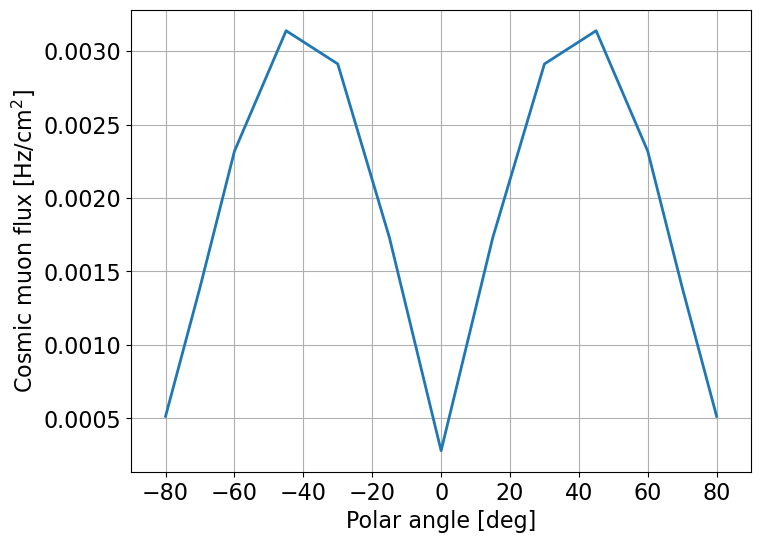

In [10]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IArray[:,0], lw = 2 )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz/cm$^2$]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")

In [8]:
# Data collected by Yuri
Exp = np.array([0.00748, 0.01007, 0.01445, 0.03516, 0.06439, 0.0969, 0.1137, 0.11306, 0.09828, 0.072336, 0.0383, 0.0219, 0.01141])

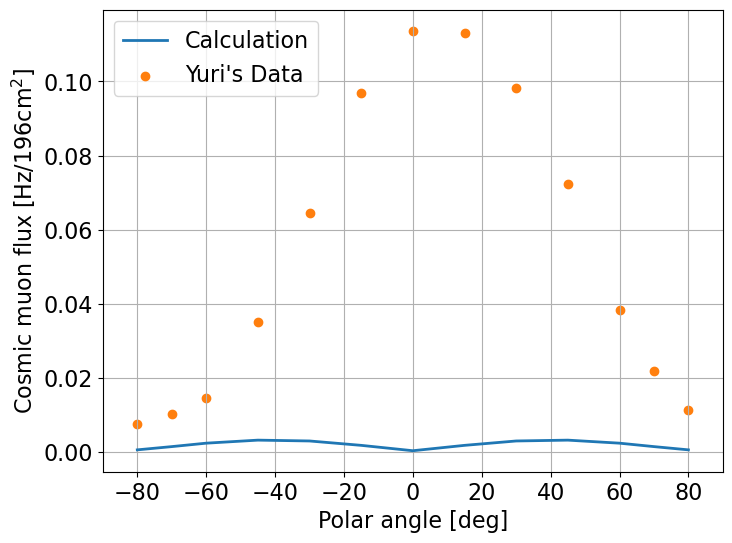

In [12]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IArray[:,0], lw = 2, label = r'Calculation' )
ax.scatter(thetaArray, Exp, c = '#ff7f0e', label = "Yuri's Data" )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz/196cm$^2$]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")
ax.legend( fontsize = 16 )
fig.savefig('CosmicMuonParam.png')

In [9]:
IArray = np.array([
    integrate.quad(dI_fixedTheta, pmin, pmax, args = (theta_c*np.pi/180))
    for theta_c in thetaArray
])
IArray

array([[2.26216917e-04, 5.98101255e-09],
       [7.38575584e-04, 1.44197453e-10],
       [1.36320281e-03, 2.59696312e-12],
       [2.26870611e-03, 3.35659239e-10],
       [2.97478624e-03, 2.79720885e-09],
       [3.41091007e-03, 7.62039025e-09],
       [3.55742589e-03, 1.02919625e-08],
       [3.41091007e-03, 7.62039025e-09],
       [2.97478624e-03, 2.79720885e-09],
       [2.26870611e-03, 3.35659239e-10],
       [1.36320281e-03, 2.59696312e-12],
       [7.38575584e-04, 1.44197453e-10],
       [2.26216917e-04, 5.98101255e-09]])

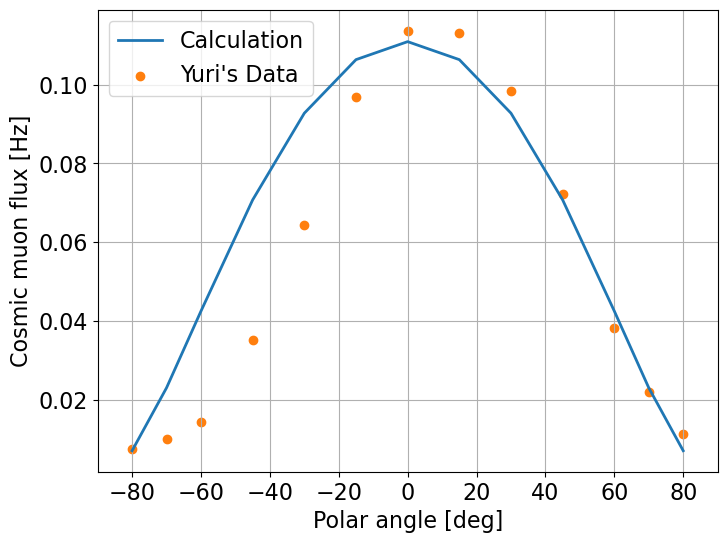

In [11]:
fig, ax = plt.subplots( figsize = (8, 6))  
ax.plot(thetaArray, IArray[:,0]*196*7/44, lw = 2, label = r'Calculation' )
ax.scatter(thetaArray, Exp, c = '#ff7f0e', label = "Yuri's Data" )
ax.set_xlabel( r'Polar angle [deg]', fontsize = 16 )
ax.set_ylabel( r'Cosmic muon flux [Hz]', fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [-90, 90])
# ax.set_ylim( [0., 0.014] )
ax.grid(":")
ax.legend( fontsize = 16 )
fig.savefig('CosmicMuonParam.png')

In [12]:
I3 = integrate.dblquad(dI, pmin, pmax, 0, np.pi/2)
I3

(0.009341633729411748, 1.3685533400372126e-08)

In [13]:
I1 = integrate.dblquad(dI, 1, pmax, 0, np.pi/2)
I1

(0.016506038288377364, 1.4630061449991351e-08)

In [14]:
I2 = integrate.dblquad(dI, 2, pmax, 0, np.pi/2)
I2

(0.012083836258816856, 1.3555685067234062e-08)

In [15]:
# The cryostat has an outer radius of 19" = 48.26cm, the area in cm^2 is
a = 48.26**2*np.pi
a

7316.855998167867

In [18]:
# Within the drift time, 187.5µs, the expected cosmic rays in each event
evtCR = I3[0]*a*187.5*1e-6
evtCR

0.012815885397325052